In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the data is in a CSV file
data = pd.read_csv('D:\\CubeAI Internship\\Project-2\\IPL_matches.csv')

# Display the first few rows of the dataframe
print(data.head())


   id  season       city        date                        team1  \
0   1    2017  Hyderabad  05-04-2017          Sunrisers Hyderabad   
1   2    2017       Pune  06-04-2017               Mumbai Indians   
2   3    2017     Rajkot  07-04-2017                Gujarat Lions   
3   4    2017     Indore  08-04-2017       Rising Pune Supergiant   
4   5    2017  Bangalore  08-04-2017  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punjab              Kings XI Punjab         field   
4             Delhi Daredevils  Royal Challengers Bangalore           bat   

   result  dl_applied                       winner  win_by_runs  \
0  normal           0          Sunrisers Hyderabad     

In [35]:


# Display the cleaned dataframe info to ensure there are no missing values
print(data.info())

# Display summary statistics of numerical columns
print(data.describe())

# Display summary statistics of categorical columns
print(data.describe(include=['O']))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [36]:
# Step 2: Mode-based Imputation
mode_values = data.mode().iloc[0]
data['city'] = data['city'].fillna(mode_values['city'])
data['winner'] = data['winner'].fillna(mode_values['winner'])
data['player_of_match'] = data['player_of_match'].fillna(mode_values['player_of_match'])
data['umpire1'] = data['umpire1'].fillna(mode_values['umpire1'])
data['umpire2'] = data['umpire2'].fillna(mode_values['umpire2'])

# Drop the umpire3 column as it contains all missing values
data = data.drop(columns=['umpire3'])

# Verify the Result
print("\nMissing Values After Handling with Mode-based Imputation:\n", data.isnull().sum())


Missing Values After Handling with Mode-based Imputation:
 id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64


In [37]:
# Display summary statistics of categorical columns
print(data.describe(include=['O']))

          city        date           team1             team2     toss_winner  \
count      636         636             636               636             636   
unique      30         450              14                14              14   
top     Mumbai  19-04-2012  Mumbai Indians  Delhi Daredevils  Mumbai Indians   
freq        92           2              82                84              85   

       toss_decision  result          winner player_of_match  \
count            636     636             636             636   
unique             2       3              14             201   
top            field  normal  Mumbai Indians        CH Gayle   
freq             363     626              95              21   

                        venue          umpire1     umpire2  
count                     636              636         636  
unique                     35               44          45  
top     M Chinnaswamy Stadium  HDPK Dharmasena  SJA Taufel  
freq                       66     

In [38]:

data.to_csv('cleaned_data.csv', index=False)


In [39]:
# Assuming the data is in a CSV file
df = pd.read_csv('D:\\CubeAI Internship\\Project-2\\cleaned_data.csv')

In [40]:
# Verify the Result
print("\n Cleaned data \n", df.isnull().sum())


 Cleaned data 
 id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64


In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

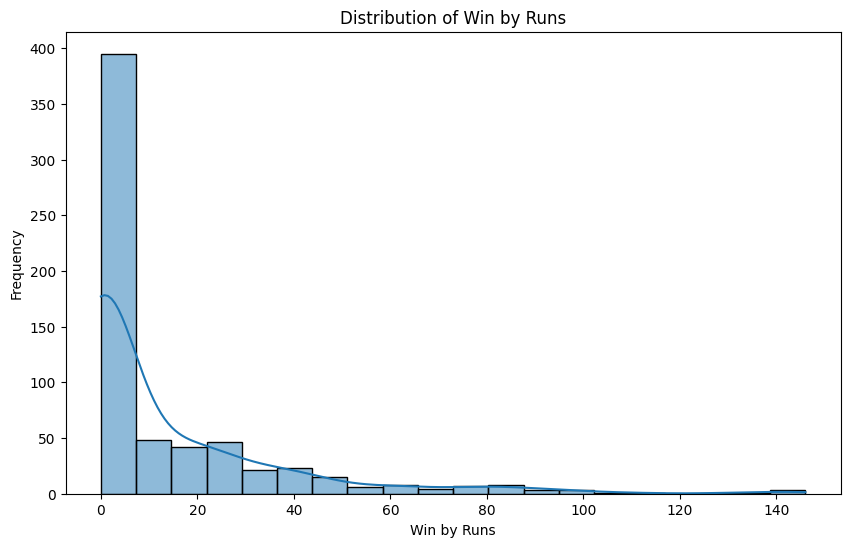

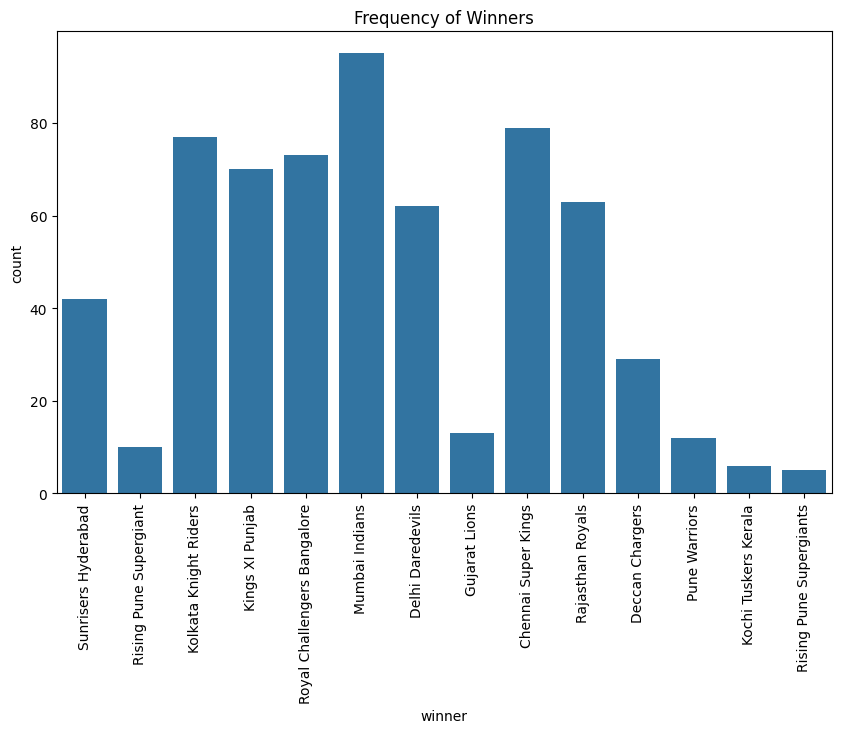

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from CSV
df = pd.read_csv('D:\\CubeAI Internship\\Project-2\\cleaned_data.csv')

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

# Univariate Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['win_by_runs'], bins=20, kde=True)
plt.title("Distribution of Win by Runs")
plt.xlabel("Win by Runs")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='winner')
plt.title("Frequency of Winners")
plt.xticks(rotation=90)
plt.show()


In [48]:
# Correlation analysis
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns.drop('id')

correlation_matrix = df[numeric_columns].corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                  season  dl_applied  win_by_runs  win_by_wickets
season          1.000000    0.004170    -0.016815       -0.000708
dl_applied      0.004170    1.000000    -0.010893       -0.011640
win_by_runs    -0.016815   -0.010893     1.000000       -0.565181
win_by_wickets -0.000708   -0.011640    -0.565181        1.000000


In [53]:

df = pd.read_csv("D:\\CubeAI Internship\\Project-2\\cleaned_data.csv")

df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y')

df.to_csv("modified_data.csv", index=False)
